In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
imagedataset = str("C:/Users/DELL/archive2")
#imagedataset1 = str("C:/Users/DELL/Downloads/archive2/")



import pathlib

data_dir = pathlib.Path(imagedataset)
#data_dir1 = pathlib.Path(imagedataset1)

In [3]:
img_height,img_width=200,200
batch_size=20
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [5]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,200,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [6]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])



C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
120/120 [==============================] - 630s 5s/step - loss: 0.3456 - accuracy: 0.8904 - val_loss: 0.1703 - val_accuracy: 0.9400
Epoch 2/30
120/120 [==============================] - 640s 5s/step - loss: 0.0851 - accuracy: 0.9767 - val_loss: 0.0848 - val_accuracy: 0.9750
Epoch 3/30
120/120 [==============================] - 638s 5s/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 4/30
120/120 [==============================] - 701s 6s/step - loss: 0.0284 - accuracy: 0.9900 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 5/30
120/120 [==============================] - 682s 6s/step - loss: 0.0198 - accuracy: 0.9958 - val_loss: 0.0958 - val_accuracy: 0.9633
Epoch 6/30
120/120 [==============================] - 666s 6s/step - loss: 0.0326 - accuracy: 0.9883 - val_loss: 0.0737 - val_accuracy: 0.9783
Epoch 7/30
120/120 [==============================] - 652s 5s/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0689 - val_accuracy: 0.9817

In [10]:
resnet_model.save('final_model.h5')

In [11]:
#CHECKING MODEL WITH GRAPHICS

resnet_model = history


HistoryDict = resnet_model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses =HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


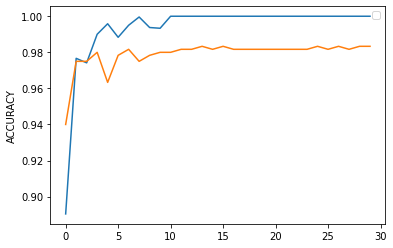

In [12]:
plt.plot(resnet_model.history["accuracy"])
plt.plot(resnet_model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

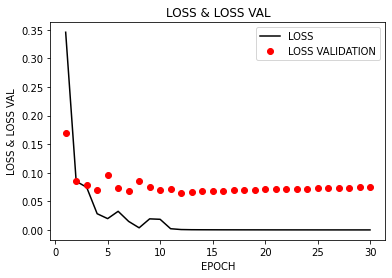

In [13]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

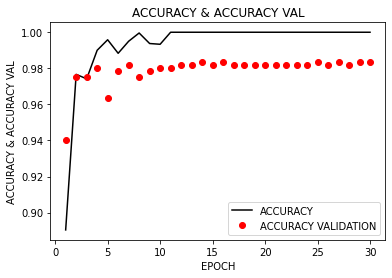

In [14]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

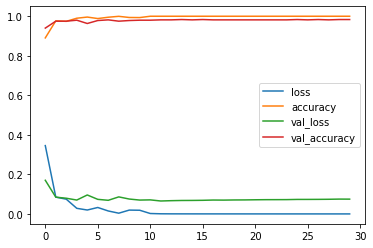

In [15]:
import pandas as pd
Dict_Summary = pd.DataFrame(resnet_model.history)
Dict_Summary.plot()

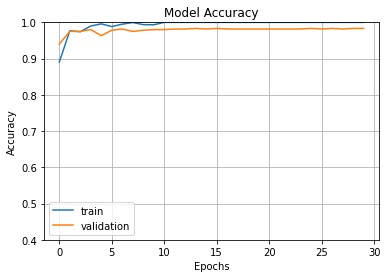

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [17]:
resnet_model.history['accuracy']

[0.89041668176651,
 0.9766666889190674,
 0.9741666913032532,
 0.9900000095367432,
 0.9958333373069763,
 0.9883333444595337,
 0.9950000047683716,
 0.9995833039283752,
 0.9937499761581421,
 0.9933333396911621,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [18]:
img_height,img_width=200,200
batch_size=20
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 300 files for validation.


In [21]:
from keras.models import load_model
new_model = tf.keras.models.load_model('final_model.h5')
Model_Results = new_model.evaluate(test_ds,verbose=True)
print(Model_Results)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

15/15 [==============================] - 62s 4s/step - loss: 0.0718 - accuracy: 0.9900
[0.07176804542541504, 0.9900000095367432]
LOSS:  0.0718
ACCURACY:  0.99
